# PDBe API Training

### PDBe search

This interactive Python notebook will guide you through programmatically accessing Protein Data Bank in Europe (PDBe)
data using our REST API

The REST API is a programmatic way to obtain information from the PDB and EMDB. You can access details about:

* sample
* experiment
* models
* compounds
* cross-references
* publications
* quality
* assemblies
* search
and more...
For more information, visit https://pdbe.org/api


This tutorial will guide you through searching PDBe programmatically.


First we will import the code which will do the work
Run the cell below - by pressing the green play button.

In [1]:
from pprint import pprint
from api_modules import run_search, pandas_dataset, pandas_count, pandas_plot, pandas_plot_multi_groupby

Now we are ready to actually run a search against the PDB API for entries containing human Dihydrofolate reductase in the PDB. This will return a list of results - only 10 to start with.

A list of search terms is available at:
https://www.ebi.ac.uk/pdbe/api/doc/search.html

We are going to search for the molecule name "Dihydrofolate reductase" in the PDB

The search terms are defined as a dictionary (a hash in other programming languages).
e.g.
{"molecule_name":"Dihydrofolate reductase"}

We have imported a function called "run_search" that will do the search for us.
We have limited this to 10 results and we will print finished at the end to show its complete

In [31]:
print('1st search - limited to 10 results')

search_terms = {"molecule_name":"Dihydrofolate reductase"}

first_results = run_search(search_terms)
print('finished')

1st search - limited to 10 results
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase"&wt=json&rows=10
Number of results for Dihydrofolate reductase: 10
finished


what if we try to search for something that doesn't exist

In [32]:
print('Getting the search wrong')

search_terms = {"something_that_does_not_exist":"Dihydrofolate reductase"}
false_results = run_search(search_terms)

Getting the search wrong
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=something_that_does_not_exist:"Dihydrofolate reductase"&wt=json&rows=10
Number of results for Dihydrofolate reductase: 0


In [33]:
search_terms = {"molecule_name":"bob"}
false_results2 = run_search(search_terms)

https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:bob&wt=json&rows=10
Number of results for bob: 0


or we define our search terms incorrectly

In [35]:
search_terms = 'bob'
false_results3 = run_search(search_terms)

search terms is not defined as a dictionary
No results


We will add organism_name of Human to the query to limit the results to only return those that are structures of Human Dihydrofolate reductase.

In [36]:
print('2nd search - two terms together')
search_terms = {
    "organism_name":"Human",
    "molecule_name":"Dihydrofolate reductase"
               }
second_results = run_search(search_terms)


2nd search - two terms together
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=organism_name:Human AND molecule_name:"Dihydrofolate reductase"&wt=json&rows=10
Number of results for Human,Dihydrofolate reductase: 10


How did we know which search terms to use?

We will then look at the results of the last search.

We will look at the first result with the following command
i.e. second_results[0]

We are going to use "pprint" (pretty print) rather than "print" to make the result easier to read.

All of the "keys" on the left side of the results can be used as a search term.

In [37]:
pprint(second_results[0])

{'_version_': 1673393061759025152,
 'abstracttext_unassigned': ['To further define the interactions that enhance '
                             'the selectivity of binding and to directly '
                             'compare the binding of the most potent analogue '
                             '{N(6)-methyl-N(6)-(3,4,5-trifluorophenyl)pyrido[2,3-d]pyrimidine-2,4,6-triamine; '
                             'compound 26} in the series of bicyclic '
                             'pyrido[2,3-d]pyrimidine analogues of piritrexim '
                             '(PTX) with native human (h), Pneumocystis '
                             'carinii (pc) and Pneumocystis jirovecii (pj) '
                             'dihydrofolate reductase (DHFR) enzymes, the '
                             'crystal structures of hDHFR complexed with '
                             'N(6)-methyl-N(6)-(4-isopropylphenyl)pyrido[2,3-d]pyrimidine-2,4,6-triamine '
                             '(compound 22), of hDHFR com

We use terms prefixed with q_ and t_ for our internal use so we can exclude the
 list of available search terms is available using the following command and then see how many search terms there are

In [38]:
keys_without_q = [q for q in second_results[0].keys() if not (q.startswith('q_') or (q.startswith('t_')))]
print('There are {} available search terms'.format(len(keys_without_q)))

There are 215 available search terms


and then print out the terms we can use

In [39]:
pprint(keys_without_q)

['abstracttext_unassigned',
 'all_assembly_composition',
 'all_assembly_form',
 'all_assembly_id',
 'all_assembly_mol_wt',
 'all_assembly_type',
 'all_authors',
 'all_molecule_names',
 'all_num_interacting_entity_id',
 'assembly_composition',
 'assembly_form',
 'assembly_id',
 'assembly_mol_wt',
 'assembly_num_component',
 'assembly_type',
 'beam_source_name',
 'biological_cell_component',
 'all_go_terms',
 'biological_function',
 'biological_process',
 'bound_compound_id',
 'bound_compound_name',
 'bound_compound_synonym',
 'bound_compound_systematic_name',
 'bound_compound_weight',
 'cath_architecture',
 'all_structure_family',
 'cath_class',
 'cath_code',
 'cath_homologous_superfamily',
 'cath_topology',
 'cell_a',
 'cell_alpha',
 'cell_b',
 'cell_beta',
 'cell_c',
 'cell_gamma',
 'citation_authors',
 'citation_doi',
 'citation_title',
 'citation_year',
 'cofactor_class',
 'cofactor_id',
 'compound_id',
 'compound_name',
 'all_compound_names',
 'compound_synonym',
 'compound_systema

As you can see we get lots of data back about the individual molecule we have searched for and the PDB entries
in which it is contained.

We can get the PDB ID and experimental method for this first result as follows.

In [40]:
print(second_results[0].get('pdb_id'))
print(second_results[0].get('experimental_method'))

4qjc
['X-ray diffraction']


Note that the experimental method is a list as there can be more than one experimental method per entry

There are too many different terms to look through so we can restrict the results to only the information we want
using a filter so its easier to see the information we want.

In [41]:
print('3rd search')
search_terms = {"molecule_name":"Dihydrofolate reductase",
                "organism_name":"Human"
               }
filter_terms = ['pdb_id', 'experimental_method']
third_results = run_search(search_terms, filter_terms)
pprint(third_results)

3rd search
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase" AND organism_name:Human&fl=pdb_id,experimental_method&wt=json&rows=10
Number of results for Dihydrofolate reductase,Human: 10
[{'experimental_method': ['X-ray diffraction'], 'pdb_id': '4qjc'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '5hqy'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '2c2s'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '1drf'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '2w3m'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '3ghc'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '4ddr'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '1u72'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '3n0h'},
 {'experimental_method': ['X-ray diffraction'], 'pdb_id': '3nxo'}]


We are still restricting the number of entries to 10 so we get the results quickly

We will then increase the number of rows to 1000 - depending on the search we might get fewer than 1000 results back

In [3]:
print('Search with 1000 rows')

search_terms = {"molecule_name":"Dihydrofolate reductase",
                "organism_name":"Human"
               }
filter_terms = ['pdb_id', 'experimental_method', 'release_year']

third_results_more_rows = run_search(search_terms, filter_terms, number_of_rows=1000)
pprint(third_results_more_rows)

Search with 1000 rows
https://www.ebi.ac.uk/pdbe/search/pdb/select?q=molecule_name:"Dihydrofolate reductase" AND organism_name:Human&fl=pdb_id,experimental_method,release_year&wt=json&rows=1000
Number of results for Dihydrofolate reductase,Human: 79
[{'experimental_method': ['X-ray diffraction'],
  'pdb_id': '4qjc',
  'release_year': 2015},
 {'experimental_method': ['X-ray diffraction'],
  'pdb_id': '5hqy',
  'release_year': 2017},
 {'experimental_method': ['X-ray diffraction'],
  'pdb_id': '2c2s',
  'release_year': 2007},
 {'experimental_method': ['X-ray diffraction'],
  'pdb_id': '1drf',
  'release_year': 1992},
 {'experimental_method': ['X-ray diffraction'],
  'pdb_id': '2w3m',
  'release_year': 2009},
 {'experimental_method': ['X-ray diffraction'],
  'pdb_id': '3ghc',
  'release_year': 2009},
 {'experimental_method': ['X-ray diffraction'],
  'pdb_id': '4ddr',
  'release_year': 2012},
 {'experimental_method': ['X-ray diffraction'],
  'pdb_id': '1u72',
  'release_year': 2005},
 {'exp

We are going to use a Python package called Pandas to help us analyse and visualise the results

In [4]:
df = pandas_dataset(list_of_results=third_results_more_rows)
print(df)

   experimental_method pdb_id  release_year
0    X-ray diffraction   4qjc          2015
1    X-ray diffraction   5hqy          2017
2    X-ray diffraction   2c2s          2007
3    X-ray diffraction   1drf          1992
4    X-ray diffraction   2w3m          2009
..                 ...    ...           ...
74   X-ray diffraction   1pdb          2003
75   X-ray diffraction   3f8z          2009
76   X-ray diffraction   2w3a          2009
77   X-ray diffraction   3ghv          2009
78   X-ray diffraction   3ntz          2011

[79 rows x 3 columns]


We can use the this to count how many PDB codes there are for each experimental method
This groups PDB IDs by experimental method and then counts the number of unique PDB IDs per method.

In [5]:
pandas_count(list_of_results=third_results_more_rows,
             column_to_group_by='experimental_method')

experimental_method
Solution NMR          1
X-ray diffraction    78
Name: pdb_id, dtype: int64

or plot the results

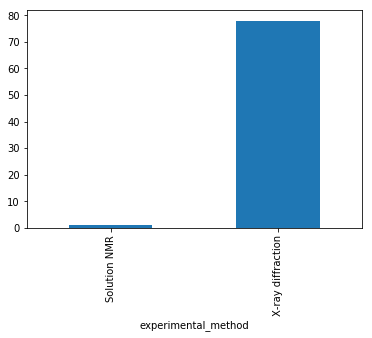

In [6]:
pandas_plot(list_of_results=third_results_more_rows,
            column_to_group_by='experimental_method',
            graph_type='bar'
            )

or plot per release year

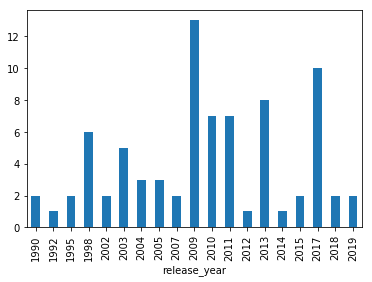

In [7]:
pandas_plot(list_of_results=third_results_more_rows,
            column_to_group_by='release_year',
            graph_type='bar'
            )

maybe a line plot makes more sense here

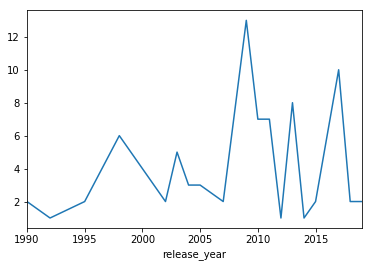

In [8]:
pandas_plot(list_of_results=third_results_more_rows,
            column_to_group_by='release_year',
            graph_type='line'
            )

Maybe we've heard that Electron Microscopy is taking over and we want to see if this is true

https://www.ebi.ac.uk/pdbe/search/pdb/select?q=release_year:[2000 TO 2019]&fl=experimental_method,release_year,pdb_id&wt=json&rows=100
Number of results for [2000 TO 2019]: 100


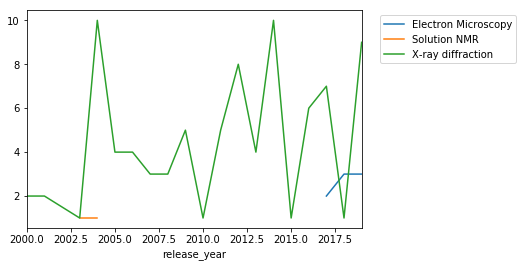

In [3]:
search_terms = {'release_year':'[2000 TO 2019]'
               }
filter_results = ['experimental_method','release_year', 'pdb_id']
results = run_search(search_terms, filter_results, number_of_rows=100)
pandas_plot_multi_groupby(results, 'release_year', 'experimental_method')

To get the full list of results we need to increase the number of results we get back

https://www.ebi.ac.uk/pdbe/search/pdb/select?q=release_year:[2000 TO 2019]&fl=experimental_method,release_year,pdb_id&wt=json&rows=100000
Number of results for [2000 TO 2019]: 100000


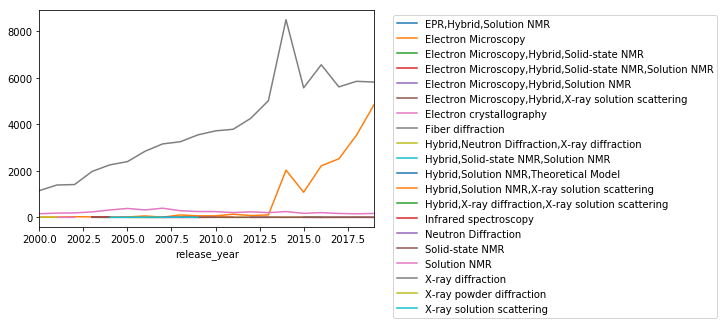

In [4]:
results = run_search(search_terms, filter_results, number_of_rows=100000)
pandas_plot_multi_groupby(results, 'release_year', 'experimental_method')